<a href="https://colab.research.google.com/github/0001010/Learn-Growth/blob/main/AutoEncoder(with_MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST데이터로 AutoEncoder구현하기
- 이미지 데이터이므로 CNN을 사용할 예정이다.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

data = tf.keras.datasets.mnist

(x_train, y_train), (x_val, y_val) = data.load_data()

print(x_train.shape, y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [2]:
x_train = x_train.reshape(-1, 28, 28, 1)

x_train = x_train / 255.

In [4]:
encoder_input = tf.keras.layers.Input(shape = (28, 28, 1))

# 28 X 28
model1 = tf.keras.layers.Conv2D(32, 3, padding = 'same')(encoder_input)
model1 = tf.keras.layers.BatchNormalization()(model1)
model1 = tf.keras.layers.LeakyReLU()(model1)

# 28 X 28 -> 14 X 14
model1 = tf.keras.layers.Conv2D(64, 3, strides = 2, padding = 'same')(model1)
model1 = tf.keras.layers.BatchNormalization()(model1)
model1 = tf.keras.layers.LeakyReLU()(model1)

# 14 X 14 -> 7 X 7
model1 = tf.keras.layers.Conv2D(64, 3, strides = 2, padding = 'same')(model1)
model1 = tf.keras.layers.BatchNormalization()(model1)
model1 = tf.keras.layers.LeakyReLU()(model1)

# 7 X 7
model1 = tf.keras.layers.Conv2D(64, 3, padding = 'same')(model1)
model1 = tf.keras.layers.BatchNormalization()(model1)
model1 = tf.keras.layers.LeakyReLU()(model1)

model1 = tf.keras.layers.Flatten()(model1)

# 2D 좌표로 표기하기 위해 2를 출력값으로 지정
encoder_output = tf.keras.layers.Dense(2)(model1)

encoder = tf.keras.models.Model(encoder_input, encoder_output)
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0     

In [5]:
decoder_input = tf.keras.Input(shape = (2,))

model2 = tf.keras.layers.Dense(7*7*64)(decoder_input)
model2 = tf.keras.layers.Reshape((7, 7, 64))(model2)

# 7 X 7 -> 7 X 7
model2 = tf.keras.layers.Conv2DTranspose(64, 3, strides = 1, padding = 'same')(model2)
model2 = tf.keras.layers.BatchNormalization()(model2)
model2 = tf.keras.layers.LeakyReLU()(model2)

# 7 X 7 -> 14 X 14
model2 = tf.keras.layers.Conv2DTranspose(64, 3, strides = 2, padding = 'same')(model2)
model2 = tf.keras.layers.BatchNormalization()(model2)
model2 = tf.keras.layers.LeakyReLU()(model2)

# 14 X 14 -> 28 X 28

model2 = tf.keras.layers.Conv2DTranspose(64, 3, strides = 2, padding = 'same')(model2)
model2 = tf.keras.layers.BatchNormalization()(model2)
model2 = tf.keras.layers.LeakyReLU()(model2)

# 28 X 28 -> 28 X 28

model2 = tf.keras.layers.Conv2DTranspose(32, 3, strides = 1, padding = 'same')(model2)
model2 = tf.keras.layers.BatchNormalization()(model2)
model2 = tf.keras.layers.LeakyReLU()(model2)

decoder_output = tf.keras.layers.Conv2DTranspose(1, 3, strides = 1, padding = 'same', activation = 'sigmoid')(model2)

decoder = tf.keras.models.Model(decoder_input, decoder_output)

decoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
batch_normalization_4 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 64)        3692

In [6]:
encoder_in = tf.keras.layers.Input(shape = (28, 28, 1))
con = encoder(encoder_in)
decoder_out = decoder(con)

auto_encoder = tf.keras.models.Model(encoder_in, decoder_out)

In [13]:
auto_encoder.compile(optimizer = tf.keras.optimizers.Adam(0.0005),
              loss = tf.keras.losses.MeanSquaredError())

auto_encoder.fit(x_train, x_train,
          batch_size = 32,
          epochs = 100)

Epoch 1/100
1875/1875 [==============================] - 65s 18ms/step - loss: 0.0513
Epoch 2/100
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0448
Epoch 3/100
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0431
Epoch 4/100
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0420
Epoch 5/100
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0414
Epoch 6/100
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0408
Epoch 7/100
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0405
Epoch 8/100
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0401
Epoch 9/100
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0399
Epoch 10/100
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0396
Epoch 11/100
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0394
Epoch 12/100
1875/1875 [============================

In [14]:
xy = encoder.predict(x_train)
xy.shape

(60000, 2)

In [15]:
encoder.save('model.h5')

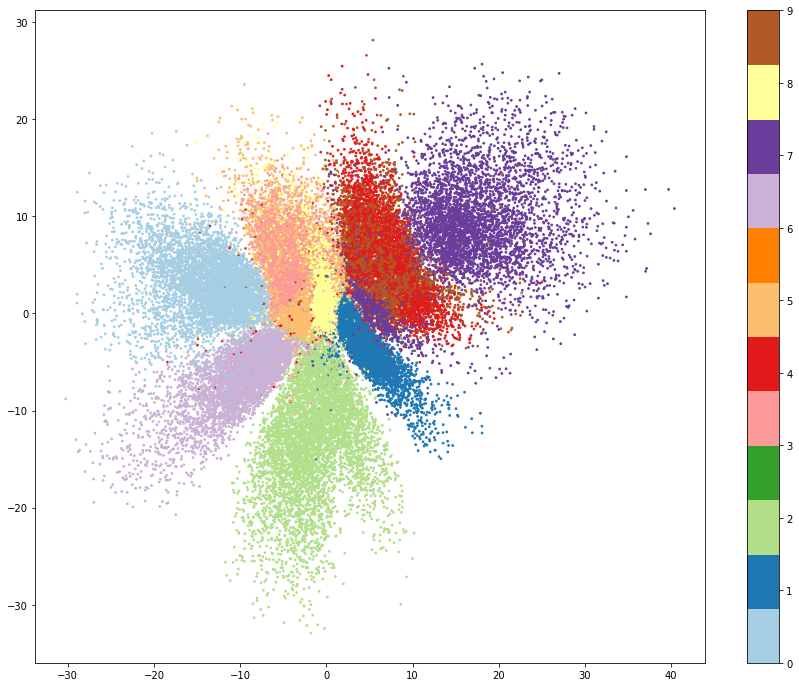

In [16]:
f, ax = plt.subplots(figsize = (15, 12))

plt.scatter(x = xy[:, 0], y = xy[:, 1],
            c = y_train,
            cmap = plt.get_cmap('Paired'), s = 3)
plt.colorbar()

plt.show()

- 생각보다 Label간의 구분이 잘된다.
- 조금 걸리는 부분은 4와 9의 범위가 겹쳐져있어서 decoding하는 과정에서 4와 9를 구분하기 어려울것 같다.

In [17]:
decoded_images = auto_encoder.predict(x_train)

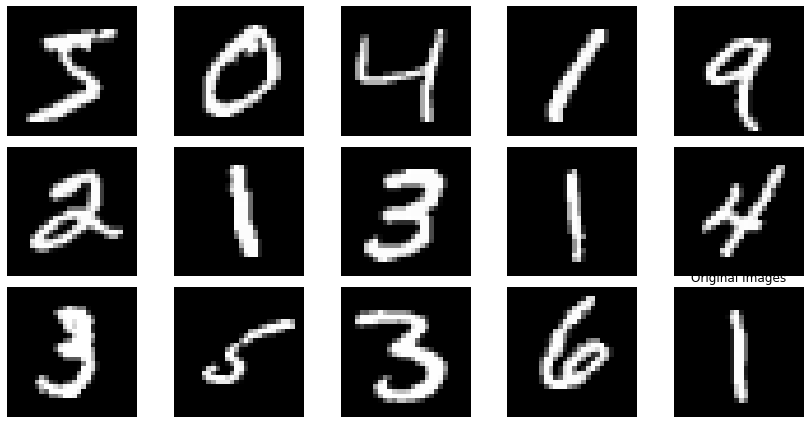

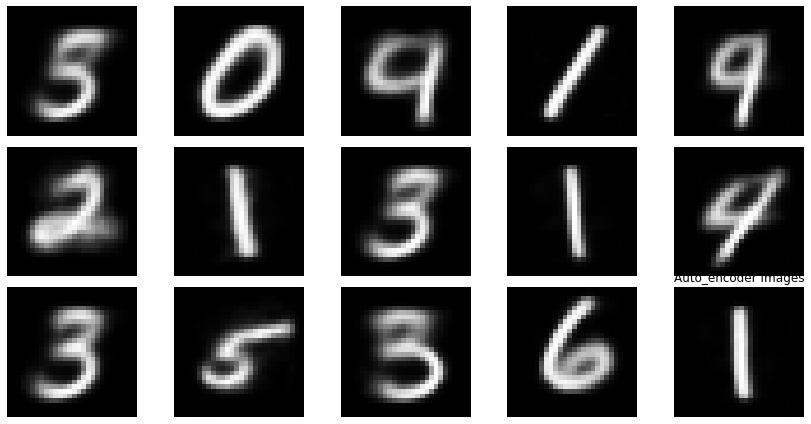

In [18]:
# Original Images

f, ax = plt.subplots(3,5)
f.set_size_inches(12, 6)

for i in range(15):
  ax[i//5, i%5].imshow(x_train[i].reshape(28, 28), cmap = 'gray')
  ax[i//5, i%5].axis('off')

plt.tight_layout()
plt.title('Original Images')


# Decoder Images

f, ax = plt.subplots(3,5)
f.set_size_inches(12, 6)

for i in range(15):
  ax[i//5, i%5].imshow(decoded_images[i].reshape(28, 28), cmap = 'gray')
  ax[i//5, i%5].axis('off')

plt.tight_layout()
plt.title('Auto_encoder Images')
plt.show()

## 노이즈 넣어서 Denoising해보기
- MNIST데이터로 진행
- 위에서 사용한 autoencoder모델을 사용할 예정

In [8]:
x_val = x_val.reshape(-1, 28, 28, 1)

x_val = x_val / 255.

noise = 0.5

x_train_noisy = x_train + noise * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
x_val_noisy = x_val + noise + np.random.normal(loc = 0.0, scale = 1.0, size = x_val.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.) # np.clip는 max값을 넘어가는 친구들의 값을 max로 맞춰줌
x_val_noisy = np.clip(x_val_noisy, 0., 1.)

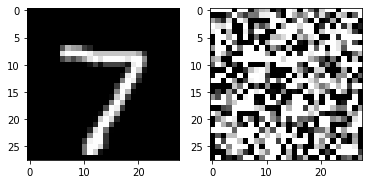

In [9]:
ax1 = plt.subplot(1,2,1) 
plt.imshow(x_val[0].reshape(28, 28), cmap = 'gray')

ax2 = plt.subplot(1,2,2)
plt.imshow(x_val_noisy[0].reshape(28, 28), cmap = 'gray')

plt.show()

- 원본데이터에 노이즈를 집어넣어보겠다. imshow로 출력해보았을때 원본의 데이터를 찾아보기 어려울 정도다.

In [10]:
# 위에서 사용된 autoencoder모델을 사용해서 학습해보자
auto_encoder.compile(optimizer = tf.keras.optimizers.Adam(0.0005),
              loss = tf.keras.losses.MeanSquaredError()) 

auto_encoder.fit(x_train_noisy, x_train,
          batch_size = 64,
          epochs = 100,
          shuffle = True,
          validation_data = (x_val_noisy, x_val))

Epoch 1/100
938/938 [==============================] - 62s 32ms/step - loss: 0.0547 - val_loss: 0.0885
Epoch 2/100
938/938 [==============================] - 29s 31ms/step - loss: 0.0485 - val_loss: 0.0715
Epoch 3/100
938/938 [==============================] - 29s 31ms/step - loss: 0.0471 - val_loss: 0.0673
Epoch 4/100
938/938 [==============================] - 29s 31ms/step - loss: 0.0462 - val_loss: 0.0675
Epoch 5/100
938/938 [==============================] - 29s 31ms/step - loss: 0.0456 - val_loss: 0.0697
Epoch 6/100
938/938 [==============================] - 29s 31ms/step - loss: 0.0452 - val_loss: 0.0674
Epoch 7/100
938/938 [==============================] - 29s 31ms/step - loss: 0.0447 - val_loss: 0.0706
Epoch 8/100
938/938 [==============================] - 29s 31ms/step - loss: 0.0444 - val_loss: 0.0689
Epoch 9/100
938/938 [==============================] - 29s 31ms/step - loss: 0.0441 - val_loss: 0.0698
Epoch 10/100
938/938 [==============================] - 29s 31ms/step - l

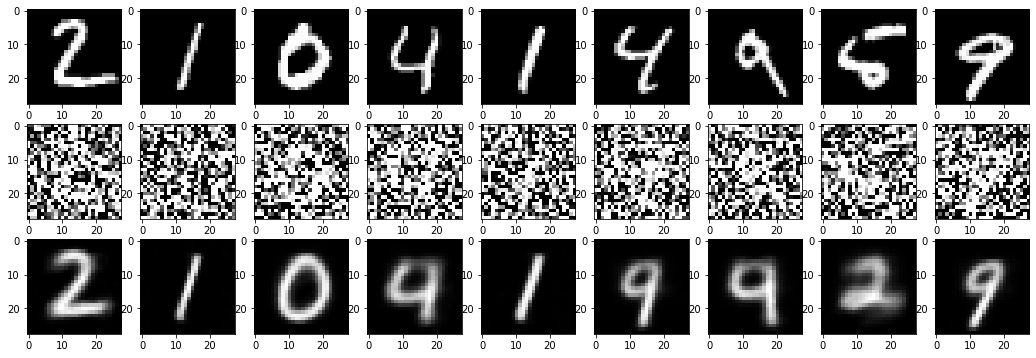

In [16]:
decoded_imgs = auto_encoder.predict(x_val)

n = 10
plt.figure(figsize=(20, 6))

for i in range(1, n):
    ax = plt.subplot(3, n, i)
    plt.imshow(x_val[i].reshape(28, 28))
    plt.gray()

    ax = plt.subplot(3, n, i + n)
    plt.imshow(x_val_noisy[i].reshape(28, 28))
    plt.gray()

    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
plt.show()

- 제일 첫번째 줄이 원본데이터이고 두번째줄이 노이즈가 삽입된 데이터 마지막 줄이 denoising 된 데이터이다.

- 결과적으로 몇개를 제외하면 denosing이 잘되었다.